In [ ]:
import numpy as np 
import pandas as pd
import os # for directories
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
#from tensorflow.keras import 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout






In [ ]:
#print(os.getcwd())

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%ls /gdrive/MyDrive/5644_ML_Project/Dataset_SkinCancer/


data/  test/  train/


In [ ]:
# to get data
train_path = os.path.join('/gdrive/MyDrive/5644_ML_Project', 'Dataset_SkinCancer/train')
print(train_path)
test_path = os.path.join('/gdrive/MyDrive/5644_ML_Project', 'Dataset_SkinCancer/test')
print(test_path)

/gdrive/MyDrive/5644_ML_Project/Dataset_SkinCancer/train
/gdrive/MyDrive/5644_ML_Project/Dataset_SkinCancer/test


In [ ]:
class_names = ['malignant', 'benign']
print("Classes",class_names)

print('Count of Train Images:')
for i in class_names:
    print(i +' Train'+ ':' + str(len(os.listdir(os.path.join(train_path, i)))))

    
print('Count of Test Images:')
for i in class_names:
    print(i +' Test'+ ':' + str(len(os.listdir(os.path.join(test_path, i)))))
    

Classes ['malignant', 'benign']
Count of Train Images:
malignant Train:1197
benign Train:1440
Count of Test Images:
malignant Test:300
benign Test:360


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2) #,horizontal_flip=True)#)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(32,32),
        batch_size=16,
        class_mode='binary',
        subset='training')
validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(32,32),
        batch_size=10,
        class_mode='binary',
        subset='validation')
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(32,32),
        batch_size=8,
        class_mode='binary')

Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
# CNN model

#def model_1 (Malignant_train_images, Malignant_test_images):
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer='he_uniform',input_shape = (32,32,3)), #padding='same' 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer='he_uniform'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = "relu", kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(80,activation = "relu", kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
    # training the model    
#opt = tf.keras.optimizers.Adam(learning_rate=0.01),
opt = keras.optimizers.Adam(learning_rate=0.001)
model.summary()

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

# checkpoint
#filepath="best_weights_p_neuron-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath = r"/gdrive/MyDrive/5644_ML_Project/model_cnn_SC.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
early_stop = EarlyStopping (monitor='val_acc', mode='max', verbose=0, patience=10)
callbacks_list = [early_stop,checkpoint]

history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 132,epochs = 100, validation_steps = 50, verbose = 1, callbacks=callbacks_list) #

  
  
   # return accuracy


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)        

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


132/132 [==============================] - 8s 56ms/step - loss: 1.1313 - acc: 0.5358 - val_loss: 0.6224 - val_acc: 0.6560
Epoch 2/100
132/132 [==============================] - 7s 55ms/step - loss: 0.5757 - acc: 0.7069 - val_loss: 0.5843 - val_acc: 0.6180
Epoch 3/100
132/132 [==============================] - 7s 55ms/step - loss: 0.5044 - acc: 0.7613 - val_loss: 0.5202 - val_acc: 0.7520
Epoch 4/100
132/132 [==============================] - 7s 54ms/step - loss: 0.4308 - acc: 0.7803 - val_loss: 0.5250 - val_acc: 0.7780
Epoch 5/100
132/132 [==============================] - 7s 55ms/step - loss: 0.4072 - acc: 0.8068 - val_loss: 0.4984 - val_acc: 0.7700
Epoch 6/100
132/132 [==============================] - 7s 54ms/step - loss: 0.4310 - acc: 0.7916 - val_loss: 0.4908 - val_acc: 0.7640
Epoch 7/100
132/132 [==============================] - 7s 54ms/step - loss: 0.3876 - acc: 0.8192 - val_loss: 0.4762 - val_acc: 0.7620
Epoch 8/100
132/132 [==============================] - 7s 54ms/step - loss

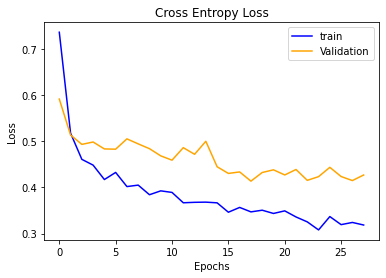

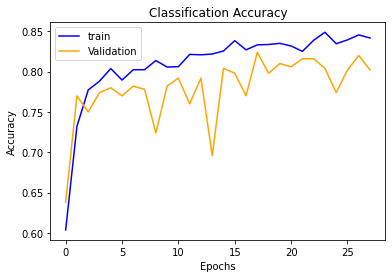

In [ ]:
from matplotlib import pyplot
# plot loss
#pyplot.subplot(211)
pyplot.figure()
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='Validation')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.savefig("/gdrive/MyDrive/5644_ML_Project/Plots/SC_CNN_loss.png")

# plot accuracy
#pyplot.subplot(212)
pyplot.figure()
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='Validation')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
# save plot to file
#filename = sys.argv[0].split('/')[-1]
pyplot.savefig('/gdrive/MyDrive/5644_ML_Project/Plots/SC_CNN_accuracy.png')

In [ ]:
loss , accuracy = model.evaluate(test_generator)

83/83 [==============================] - 2s 23ms/step - loss: 0.3486 - acc: 0.8424
